
# EDA: resettlement.csv

Dieses Notebook gibt einen Überblick über den Datensatz resettlement.csv.
Der Datensatz enthält Informationen zu umgesiedelten Flüchtlingen (Resettlement)
nach Aufnahmeland, Herkunftsland und Jahr.




In [3]:

import pandas as pd
import matplotlib.pyplot as plt



## Datensatz laden


In [4]:

df = pd.read_csv("../archive/resettlement.csv")
df.head()


,Country / territory of asylum/residence,Origin,Year,Value
0,Canada,Albania,1959,17
1,Canada,Austria,1959,17
2,Canada,Belgium,1959,2
3,Canada,Bulgaria,1959,35
4,Canada,China,1959,2



## Überblick über den Datensatz


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9075 entries, 0 to 9074
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country / territory of asylum/residence  9075 non-null   object
 1   Origin                                   9075 non-null   object
 2   Year                                     9075 non-null   int64 
 3   Value                                    9075 non-null   object
dtypes: int64(1), object(3)
memory usage: 283.7+ KB



## Datentypen bereinigen

Die Spalte `Year` und `Value` werden explizit in numerische Werte umgewandelt.


In [6]:

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')



## Fehlende Werte


In [7]:

df.isna().sum()


Country / territory of asylum/residence      0
Origin                                       0
Year                                         0
Value                                      157
dtype: int64


## Zeitliche Entwicklung der Resettlement-Zahlen (global)


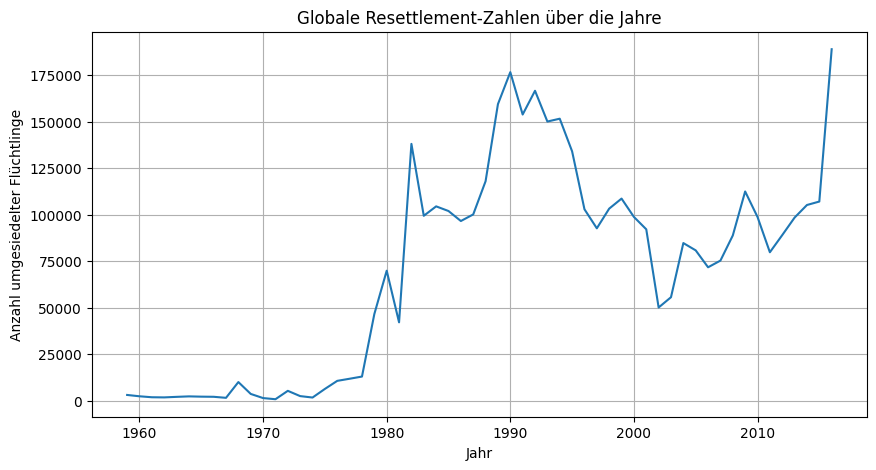

In [8]:

yearly = df.groupby('Year')['Value'].sum(min_count=1)

plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly.values)
plt.xlabel("Jahr")
plt.ylabel("Anzahl umgesiedelter Flüchtlinge")
plt.title("Globale Resettlement-Zahlen über die Jahre")
plt.grid(True)
plt.show()



## Top-Aufnahmeländer (gesamt)


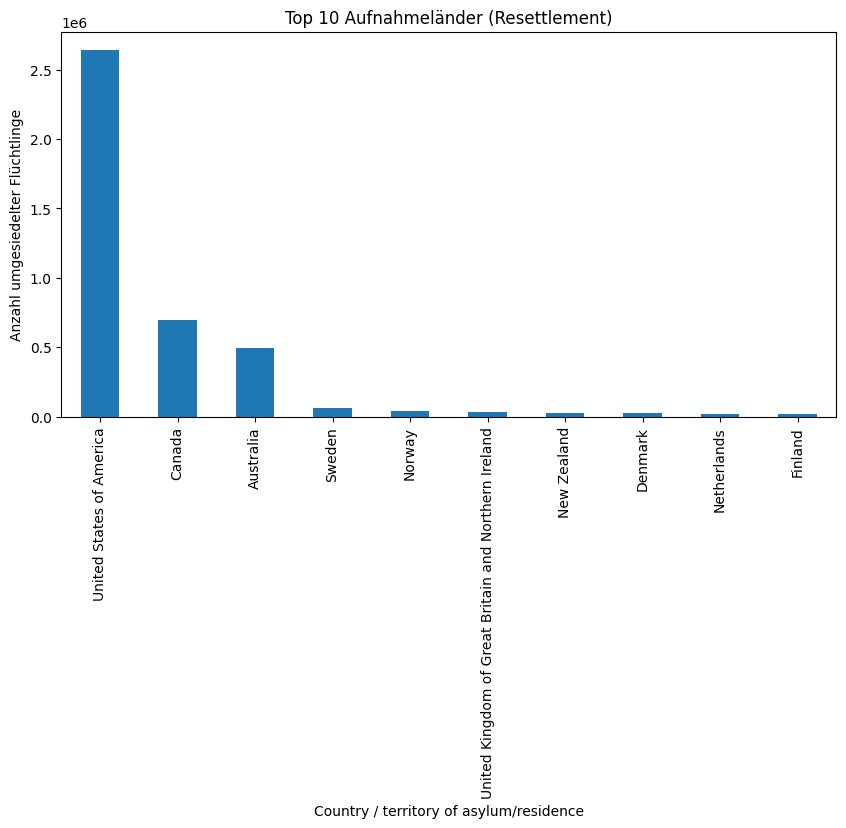

In [9]:

top_destinations = (
    df.groupby('Country / territory of asylum/residence')['Value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_destinations.plot(kind='bar', figsize=(10,5))
plt.ylabel("Anzahl umgesiedelter Flüchtlinge")
plt.title("Top 10 Aufnahmeländer (Resettlement)")
plt.show()



## Top-Herkunftsländer (gesamt)


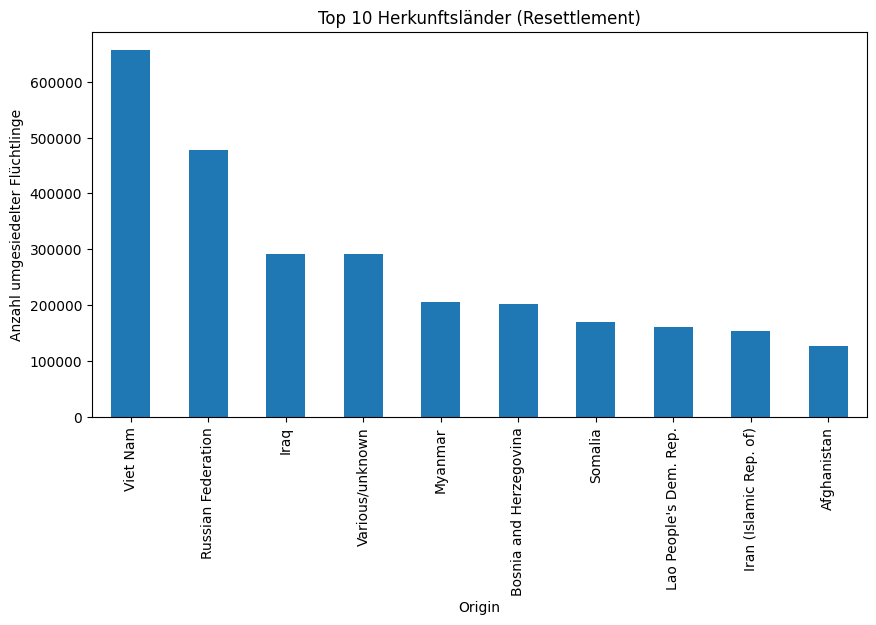

In [10]:

top_origins = (
    df.groupby('Origin')['Value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_origins.plot(kind='bar', figsize=(10,5))
plt.ylabel("Anzahl umgesiedelter Flüchtlinge")
plt.title("Top 10 Herkunftsländer (Resettlement)")
plt.show()



## Fazit (EDA)

- Der Resettlement-Datensatz ist klar strukturiert und gut aggregierbar.
- Die Zahlen zeigen starke zeitliche Schwankungen.
- Wenige Länder tragen den Großteil der weltweiten Resettlement-Aufnahmen.
- Der Datensatz eignet sich gut für Zeitreihenanalysen und Ländervergleiche.
